In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2, os
from tqdm import tqdm

from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
os.listdir()

['trainX.pkl',
 'CNN_Covid19_Xray_V1.h5',
 'archive.zip',
 'inc_history.ipynb',
 'valY.pkl',
 'vgg16.ipynb',
 'le.pkl',
 'CNNmodel.ipynb',
 'COVID-19_Radiography_Dataset',
 'objs.pkl',
 'vgg16_model.h5',
 'trainY.pkl',
 'valX.pkl',
 'cuda-repo-ubuntu2004-11-0-local_11.0.2-450.51.05-1_amd64.deb',
 'inc_history_model.h5',
 'resnet.ipynb',
 'cuda-repo-ubuntu2004-11-2-local_11.2.0-460.27.04-1_amd64.deb',
 'RNNmodel.ipynb',
 'Project.ipynb',
 'tensorflow',
 'ven',
 'Xray-classification-main',
 'testX.pkl',
 'requirements.txt',
 'resnet50_model.h5',
 'FFNNmodel.ipynb',
 'Preprocessing.ipynb',
 'testY.pkl',
 '.ipynb_checkpoints',
 'cuda-repo-ubuntu2004-11-4-local_11.4.1-470.57.02-1_amd64.deb',
 'Untitled.ipynb']

In [3]:
os.listdir('COVID-19_Radiography_Dataset')

['COVID.metadata.xlsx',
 'Lung_Opacity',
 'Viral Pneumonia.metadata.xlsx',
 'Viral Pneumonia',
 'Lung_Opacity.metadata.xlsx',
 'Normal',
 'COVID',
 'README.md.txt',
 'Normal.metadata.xlsx']

In [4]:
imagePaths = []
for dirname, _, filenames in os.walk('COVID-19_Radiography_Dataset'):

    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

In [5]:
Data = []
Target = []
imgsize = 150
size=[]
# imagePaths = imagePaths[::15]
cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19',
       'Lung_Opacity': 'Lung Opacity'}

for imagePath in tqdm(imagePaths):
#     size.append(plt.imread(imagePath).shape)
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (imgsize, imgsize)) /255
    Data.append(image)
    Target.append(cat[label])

100%|██████████| 21165/21165 [02:04<00:00, 169.48it/s]


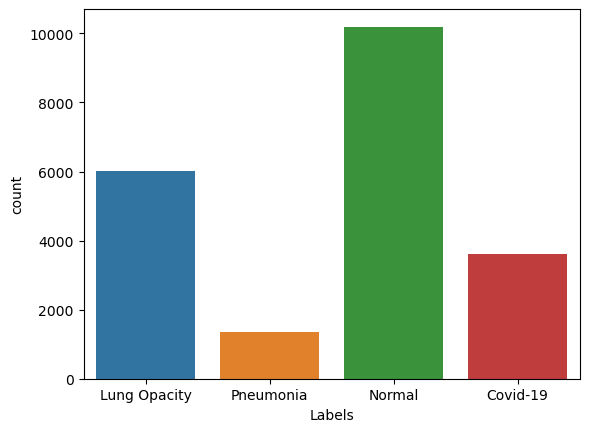

Covid-19: 3616
Normal: 10192
Pneumonia:  1345
Lung Opacity: 6012


In [6]:
df = pd.DataFrame(Target,columns=['Labels'])
sns.countplot(x = df['Labels'])
sns.set(rc={'figure.figsize':(8,3)})
plt.show()
print('Covid-19:',Target.count('Covid-19'))
print('Normal:',Target.count('Normal'))
print('Pneumonia: ',Target.count('Pneumonia'))
print('Lung Opacity:',Target.count('Lung Opacity'))


In [7]:
# pd.Series(size).value_counts()

In [8]:
Data[1][1][1]

array([0., 0., 0.])

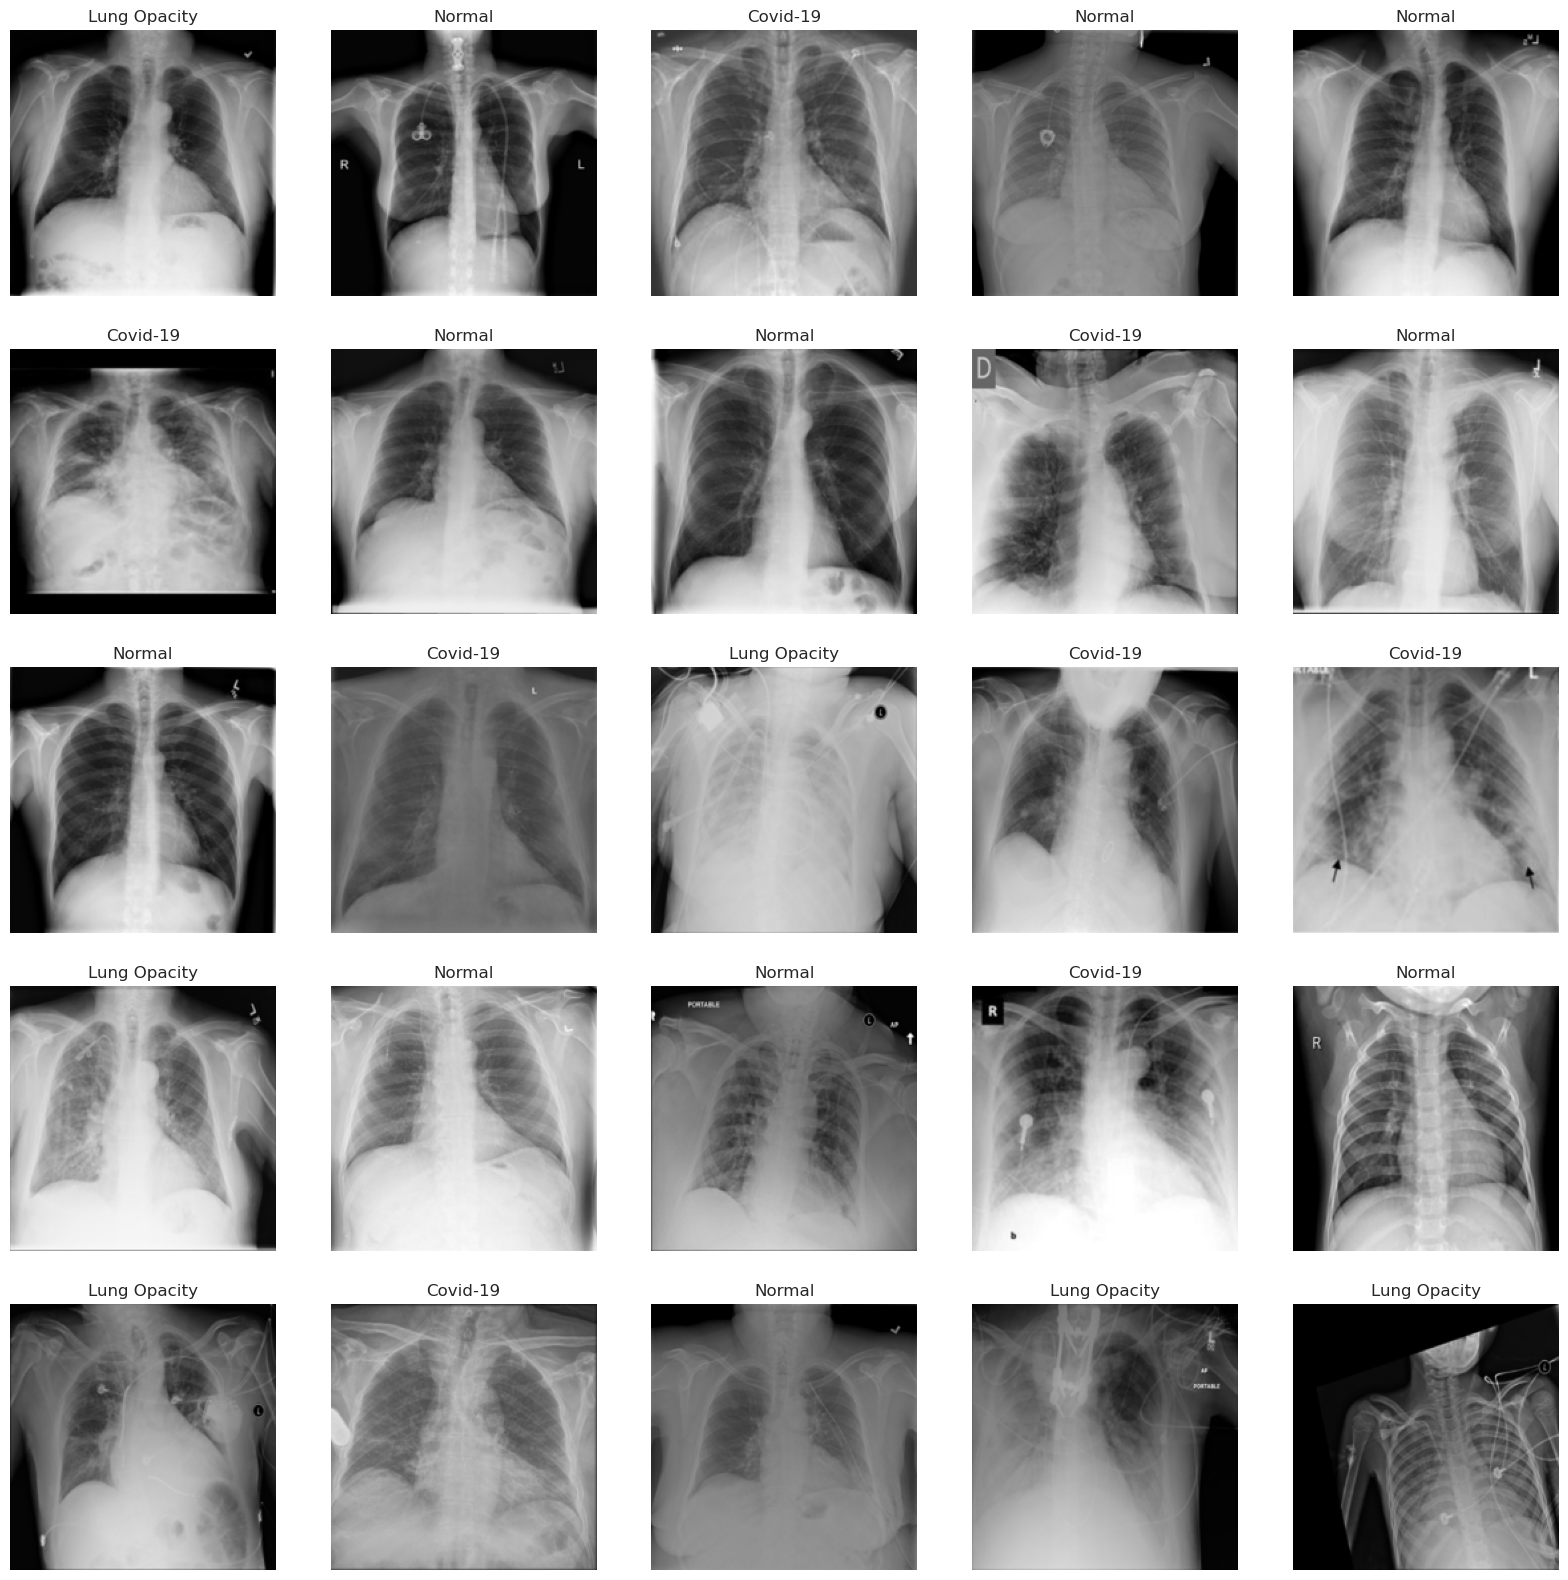

In [9]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(imagePaths),25))) :
    plt.subplot(5,5,n+1)
    plt.imshow(Data[i] , cmap='gray')
    plt.title(Target[i])
    plt.axis('off')     
plt.show()

In [10]:
le = LabelEncoder()
labels = le.fit_transform(Target)
print(labels)
labels = to_categorical(labels)
print(le.classes_)
print(labels)

[1 1 1 ... 0 0 0]
['Covid-19' 'Lung Opacity' 'Normal' 'Pneumonia']
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
(x_train, x_test, y_train, y_test) = train_test_split(Data, labels,test_size=0.20,
                                                      stratify=labels,random_state=42)
(x_train, x_val, y_train, y_val) = train_test_split(x_train,y_train,test_size=0.2,random_state=42)
    
trainX = np.array(x_train)
testX = np.array(x_test)
trainY = np.array(y_train)
testY = np.array(y_test)
valX = np.array(x_val)
valY = np.array(y_val)

print(trainX.shape)
print(testX.shape)
print(valX.shape)
print(trainY.shape)
print(testY.shape)
print(valY.shape)

In [ ]:
del(Data)
del(imagePaths)
del(size)
del(imgsize)

In [ ]:
import pickle
pickle.HIGHEST_PROTOCOL

In [ ]:

with open('trainX.pkl', 'wb') as f:
    pickle.dump(trainX, f, protocol=5)
    
with open('testX.pkl', 'wb') as f:
    pickle.dump(testX, f, protocol=5)
    
with open('trainY.pkl', 'wb') as f:
    pickle.dump(trainY, f, protocol=5)
    
with open('testY.pkl', 'wb') as f:
    pickle.dump(testY, f, protocol=5)
    
with open('valX.pkl', 'wb') as f:
    pickle.dump(valX, f, protocol=5)
    
with open('valY.pkl', 'wb') as f:
    pickle.dump(valY, f, protocol=5)

with open('le.pkl', 'wb') as f:
    pickle.dump(le, f, protocol=5)
    